### Extracción, Transformación y Carga de los datos de calidad de aire y salud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

c:\Users\hgera\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Carguemos los datos 

In [2]:
# base_path = 'data' + os.sep + 'raw'  
base_path = 'data' + os.sep + 'raw'  

In [3]:
contaminantes = os.listdir(base_path)
contaminantes_path = [base_path + os.sep + contaminante for contaminante in contaminantes]


In [4]:
data = {contaminantes[i]: {} for i in range(len(contaminantes))}
# print(data.items())
for i,contaminante_path in enumerate(contaminantes_path):
    archivos = os.listdir(contaminante_path)
    for archivo in archivos:
        if archivo.endswith('.xlsx'):
            print('Cargando',contaminantes[i], archivo) 
            estacion = archivo.split('.')[0]
            df =  pd.read_excel(contaminante_path + os.sep + archivo, engine='openpyxl')
            df.dropna(inplace=True, axis=0,ignore_index= True)
            # pd.to_datetime(df['Fecha'], dayfirst= False)
             #Unir fecha y hora en una nueva columna de tipo datetime
            hora = df['Hora'].str.split(" - ").str[1]
             
            df['Fecha'] = pd.to_datetime(
                df['Fecha'].astype(str) + " " +
                hora.astype(str)
            )
            
            data[contaminantes[i]][estacion] = df
               
            

Cargando Dioxido_azufre CDMX_CCA2023.xlsx
Cargando Dioxido_azufre CDMX_UAMI2023.xlsx
Cargando Dioxido_azufre NL_Cadereyta23-24.xlsx
Cargando Dioxido_azufre NL_Juarez23-24.xlsx
Cargando Dioxido_azufre NL_Universidad23-24.xlsx
Cargando Dioxido_nitrogeno CDMX_CCA2023.xlsx
Cargando Dioxido_nitrogeno CDMX_UAMI2023.xlsx
Cargando Dioxido_nitrogeno NL_Cadereyta23-24.xlsx
Cargando Dioxido_nitrogeno NL_Juarez23-24.xlsx
Cargando Dioxido_nitrogeno NL_Universidad23-24.xlsx
Cargando Monoxido_carbono CDMX_CCA2023.xlsx
Cargando Monoxido_carbono CDMX_UAMI2023.xlsx
Cargando Monoxido_carbono NL_Cadereyta23-24.xlsx
Cargando Monoxido_carbono NL_Juarez23-24.xlsx
Cargando Monoxido_carbono NL_Universidad23-24.xlsx
Cargando Ozono CDMX_CCA2023.xlsx
Cargando Ozono CDMX_UAMI2023.xlsx
Cargando Ozono NL_Cadereyta23-24.xlsx
Cargando Ozono NL_Juarez23-24.xlsx
Cargando Ozono NL_Universidad23-24.xlsx
Cargando PM10 CDMX_UAMI2023.xlsx
Cargando PM10 NL_Cadereyta23-24.xlsx
Cargando PM10 NL_Juarez23-24.xlsx
Cargando PM10 NL

### Visualicemos por ejemplo algún archivo de PM 2.5

In [5]:
data.keys()

dict_keys(['Dioxido_azufre', 'Dioxido_nitrogeno', 'Monoxido_carbono', 'Ozono', 'PM10', 'PM25'])

In [6]:
data['PM25'].keys()

dict_keys(['CDMX_CCA2023', 'CDMX_UAMI2023', 'NL_Cadereyta23-24', 'NL_Juarez23-24', 'NL_Universidad23-24'])

In [7]:
# data['PM25']['NL_universidad2024'].head(24)
data['PM25']['NL_Cadereyta23-24'].head(24)


,Parámetro,Fecha,Hora,Concentraciones horarias,Unidad
0,PM2.5,2023-01-01 01:00:00,0:00 - 1:00,190.0,µg/m³
1,PM2.5,2023-01-01 02:00:00,1:00 - 2:00,93.0,µg/m³
2,PM2.5,2023-01-01 03:00:00,2:00 - 3:00,85.0,µg/m³
3,PM2.5,2023-01-01 04:00:00,3:00 - 4:00,145.0,µg/m³
4,PM2.5,2023-01-01 05:00:00,4:00 - 5:00,191.0,µg/m³
5,PM2.5,2023-01-01 06:00:00,5:00 - 6:00,96.0,µg/m³
6,PM2.5,2023-01-01 07:00:00,6:00 - 7:00,84.0,µg/m³
7,PM2.5,2023-01-01 08:00:00,7:00 - 8:00,98.0,µg/m³
8,PM2.5,2023-01-01 09:00:00,8:00 - 9:00,124.0,µg/m³
9,PM2.5,2023-01-01 10:00:00,9:00 - 10:00,100.0,µg/m³


In [8]:

data['PM25']['NL_Cadereyta23-24'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15251 entries, 0 to 15250
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Parámetro                 15251 non-null  object        
 1   Fecha                     15251 non-null  datetime64[ns]
 2   Hora                      15251 non-null  object        
 3   Concentraciones horarias  15251 non-null  float64       
 4   Unidad                    15251 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 595.9+ KB


In [9]:
data['PM25']['NL_Cadereyta23-24'].describe()

,Fecha,Concentraciones horarias
count,15251,15251.000000
mean,2023-12-25 11:12:42.205756928,16.394859
min,2023-01-01 01:00:00,-9999.000000
25%,2023-06-23 04:30:00,8.000000
50%,2023-12-18 03:00:00,14.000000
75%,2024-06-26 17:30:00,24.000000
max,2025-01-01 23:00:00,483.000000
std,NaN,115.745325


Text(0.5, 1.0, 'PM 2.5 en NL cadereyta 2023-2024')

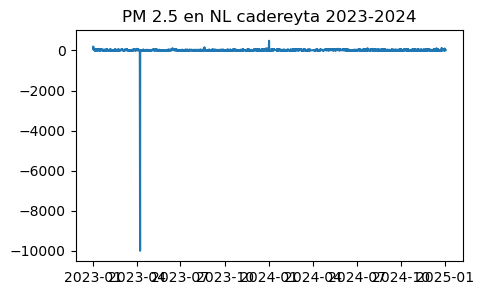

In [10]:
plt.figure(figsize=(5,3))
plt.plot(data['PM25']['NL_Cadereyta23-24']['Fecha'], data['PM25']['NL_Cadereyta23-24']['Concentraciones horarias'])
plt.title('PM 2.5 en NL cadereyta 2023-2024')


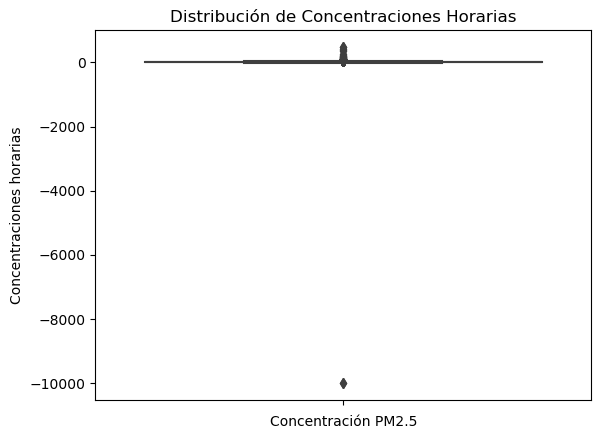

In [11]:
sns.boxplot(y=data['PM25']['NL_Cadereyta23-24']['Concentraciones horarias'])
plt.title("Distribución de Concentraciones Horarias")
plt.xlabel("Concentración PM2.5")
plt.show()


#### Notese como existe valores fuera de rango como -9999, quitemos los outliers.

In [12]:
df = data['PM25']['NL_Cadereyta23-24'].copy()

# Calcular los cuartiles y el IQR
Q1 = df['Concentraciones horarias'].quantile(0.25)
Q3 = df['Concentraciones horarias'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Concentraciones horarias'] < limite_inferior) | (df['Concentraciones horarias'] > limite_superior)]
print("Outliers detectados:\n", outliers['Concentraciones horarias'].count())   

# Filtrar y eliminar outliers
df_filtrado = df [(df['Concentraciones horarias'] >= limite_inferior) & (df['Concentraciones horarias'] <= limite_superior)]
print("\nDatos después de eliminar outliers:\n", df_filtrado['Concentraciones horarias'].count())

Outliers detectados:
 437

Datos después de eliminar outliers:
 14814


In [13]:
df_filtrado.head(24)

,Parámetro,Fecha,Hora,Concentraciones horarias,Unidad
12,PM2.5,2023-01-01 13:00:00,12:00 - 13:00,39.0,µg/m³
13,PM2.5,2023-01-01 14:00:00,13:00 - 14:00,46.0,µg/m³
14,PM2.5,2023-01-01 15:00:00,14:00 - 15:00,33.0,µg/m³
16,PM2.5,2023-01-01 17:00:00,16:00 - 17:00,48.0,µg/m³
17,PM2.5,2023-01-01 18:00:00,17:00 - 18:00,37.0,µg/m³
18,PM2.5,2023-01-01 19:00:00,18:00 - 19:00,33.0,µg/m³
19,PM2.5,2023-01-01 20:00:00,19:00 - 20:00,40.0,µg/m³
20,PM2.5,2023-01-01 21:00:00,20:00 - 21:00,44.0,µg/m³
21,PM2.5,2023-01-01 22:00:00,21:00 - 22:00,30.0,µg/m³
22,PM2.5,2023-01-01 23:00:00,22:00 - 23:00,21.0,µg/m³


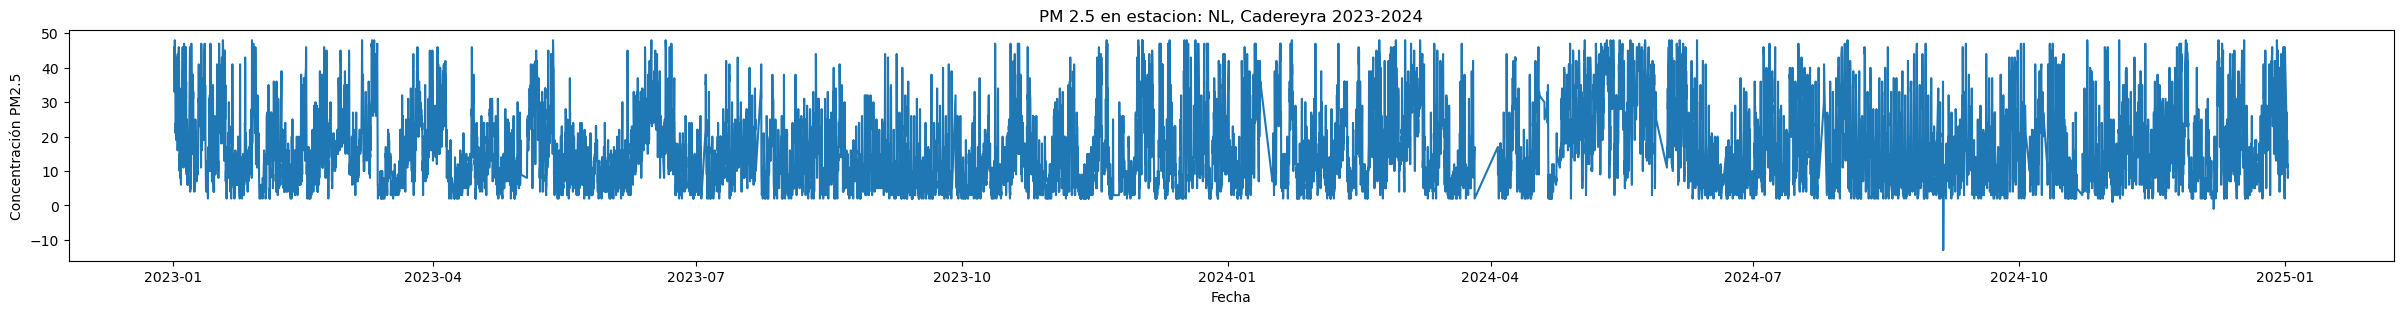

In [14]:
plt.figure(figsize=(30,3))
plt.plot(df_filtrado['Fecha'] , df_filtrado['Concentraciones horarias'])
plt.title('PM 2.5 en estacion: NL, Cadereyra 2023-2024')
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5')
plt.show()


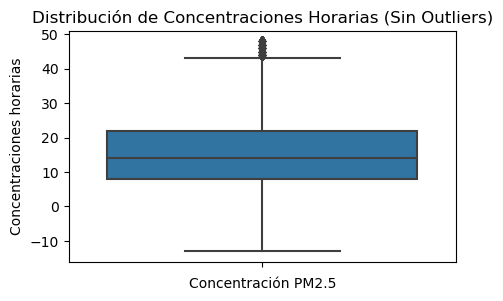

In [15]:
plt.figure(figsize=(5,3))
sns.boxplot(y=df_filtrado['Concentraciones horarias'])
plt.title("Distribución de Concentraciones Horarias (Sin Outliers)")
plt.xlabel("Concentración PM2.5")
plt.show()


#### Ahora limpiemos todos los datos de todas las estaciones 

In [16]:
data_clean = {}  # Diccionario para almacenar datos sin outliers

for data_contaminante in data.keys():
    
    data_clean[data_contaminante] = {}  # Crear clave para cada contaminante
    
    for estacion in data[data_contaminante].keys():
        df = data[data_contaminante][estacion].copy()

        # Calcular los cuartiles y el IQR
        Q1 = df['Concentraciones horarias'].quantile(0.25)
        Q3 = df['Concentraciones horarias'].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para detectar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df['Concentraciones horarias'] < limite_inferior) | (df['Concentraciones horarias'] > limite_superior)]
        print(f"{estacion} - {data_contaminante}")
        print("Outliers detectados:", outliers['Concentraciones horarias'].count())   

        # Filtrar y eliminar outliers
        df_filtrado = df[(df['Concentraciones horarias'] >= limite_inferior) & (df['Concentraciones horarias'] <= limite_superior)]
        print("Datos después de eliminar outliers:", df_filtrado['Concentraciones horarias'].count())
        print('---'*50)
        # Guardar en data_clean con la misma estructura
        data_clean[data_contaminante][estacion] = df_filtrado

print("\nProceso de limpieza completado.")


CDMX_CCA2023 - Dioxido_azufre
Outliers detectados: 355
Datos después de eliminar outliers: 5506
------------------------------------------------------------------------------------------------------------------------------------------------------
CDMX_UAMI2023 - Dioxido_azufre
Outliers detectados: 220
Datos después de eliminar outliers: 3158
------------------------------------------------------------------------------------------------------------------------------------------------------
NL_Cadereyta23-24 - Dioxido_azufre
Outliers detectados: 2248
Datos después de eliminar outliers: 14174
------------------------------------------------------------------------------------------------------------------------------------------------------
NL_Juarez23-24 - Dioxido_azufre
Outliers detectados: 1594
Datos después de eliminar outliers: 14671
------------------------------------------------------------------------------------------------------------------------------------------------------


#### Observemos de nuevo algún ejemplo de datos ya limpios

In [17]:
fig = px.line(
    data_clean['PM25']['NL_Cadereyta23-24'], 
    x='Fecha', 
    y='Concentraciones horarias', 
    title='PM 2.5 en CDMX estación NL2023-2024',
    labels={'Fecha': 'Fecha y Hora', 'Concentraciones horarias': 'PM2.5 (µg/m³)'},  # Etiquetas personalizadas
    line_shape='vh',  
    markers=True,  # Puntos en la línea
    color_discrete_sequence=['black'],  # Color de la línea
)

# Personalización adicional
fig.update_layout(
    xaxis_title="Fecha y Hora",
    yaxis_title="Concentración de PM2.5 (µg/m³)",
    xaxis_tickangle=-45,  # Rotar etiquetas del eje X
    template= 'seaborn',  # Estilo oscuro
)

fig.show()


c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


### Filtremos por mes

In [18]:
# Filtrar los datos para cualquier mes
numero_mes = 9
data_por_mes = data_clean['PM25']['NL_Cadereyta23-24'][data_clean['PM25']['NL_Cadereyta23-24']['Fecha'].dt.month == numero_mes]
# Generar el gráfico
fig = px.line(
    data_por_mes, 
    x='Fecha', 
    y='Concentraciones horarias', 
    title='PM 2.5 en CDMX estación UAMI2023 ',
    labels={'Fecha': 'Fecha y Hora', 'Concentraciones horarias': 'PM2.5 (µg/m³)'},
    line_shape='vh',  # Considera cambiar a 'linear' o 'spline' para una línea más suave
    markers=True,  # Puntos en la línea
    color_discrete_sequence=['black'],  # Color de la línea
)

# Actualización de la línea
fig.update_traces(
    marker=dict(size=5),  # Tamaño de los marcadores
    line=dict(dash='solid', width=2)  # Línea sólida, ancho de 2
)

# Personalización adicional con opacidad para la figura entera
fig.update_layout(
    xaxis_title="Fecha y Hora",
    yaxis_title="Concentración de PM2.5 (µg/m³)",
    xaxis_tickangle=-45,  # Rotar etiquetas del eje X
    template='seaborn',  # Estilo de la plantilla
)

fig.show()

c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#### Hay un problema, hay valores que no fueron registrados por las estaciones, ya sea por que estuviera en mantenimiento o alguna otra situación, rellenemos con ceros para aquellas horas en las que no hay valores

In [19]:
data_clean['PM25']['NL_Cadereyta23-24'].head()  #### Por ejemplo aqui, se hace un salto de las 00:00 a las 14:00

,Parámetro,Fecha,Hora,Concentraciones horarias,Unidad
12,PM2.5,2023-01-01 13:00:00,12:00 - 13:00,39.0,µg/m³
13,PM2.5,2023-01-01 14:00:00,13:00 - 14:00,46.0,µg/m³
14,PM2.5,2023-01-01 15:00:00,14:00 - 15:00,33.0,µg/m³
16,PM2.5,2023-01-01 17:00:00,16:00 - 17:00,48.0,µg/m³
17,PM2.5,2023-01-01 18:00:00,17:00 - 18:00,37.0,µg/m³


In [20]:

for data_contaminante in data_clean.keys():
    for estacion in data_clean[data_contaminante].keys():
        # Convertir la columna 'Fecha' a formato datetime
        data_clean[data_contaminante][estacion]['Fecha'] = pd.to_datetime(data_clean[data_contaminante][estacion]['Fecha'])

        # Crear un rango de fechas con frecuencia de 1 hora
        rango_fechas = pd.date_range(
            start=data_clean[data_contaminante][estacion]['Fecha'].min(), 
            end=data_clean[data_contaminante][estacion]['Fecha'].max(), 
            freq='h'
        )

        # Reindexar el dataframe sin llenar valores aún
        data_clean[data_contaminante][estacion] = (
            data_clean[data_contaminante][estacion]
            .set_index('Fecha')
            .reindex(rango_fechas)
        )

        # Rellenar solo la columna 'Concentraciones Horarias' con ceros
        if 'Concentraciones horarias' in data_clean[data_contaminante][estacion].columns:
            data_clean[data_contaminante][estacion]['Concentraciones horarias'].fillna(0, inplace=True)

        # Rellenar la columna 'Parámetros' con el último valor conocido
        if 'Parámetro' in data_clean[data_contaminante][estacion].columns:
            data_clean[data_contaminante][estacion]['Parámetro'].ffill(inplace=True)  # Forward fill
            
        if 'Unidad' in data_clean[data_contaminante][estacion].columns:
            data_clean[data_contaminante][estacion]['Unidad'].ffill(inplace=True)  # Forward fill


        # Resetear el índice para restaurar la columna 'Fecha'
        data_clean[data_contaminante][estacion] = data_clean[data_contaminante][estacion].reset_index().rename(columns={'index': 'Fecha'})
        data_clean[data_contaminante][estacion].drop(columns=['Hora'], inplace=True, errors='ignore')



C:\Users\hgera\AppData\Local\Temp\ipykernel_13976\671835264.py:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hgera\AppData\Local\Temp\ipykernel_13976\671835264.py:26: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [21]:
data_clean['PM25']['NL_Cadereyta23-24'].head(24) 

,Fecha,Parámetro,Concentraciones horarias,Unidad
0,2023-01-01 13:00:00,PM2.5,39.0,µg/m³
1,2023-01-01 14:00:00,PM2.5,46.0,µg/m³
2,2023-01-01 15:00:00,PM2.5,33.0,µg/m³
3,2023-01-01 16:00:00,PM2.5,0.0,µg/m³
4,2023-01-01 17:00:00,PM2.5,48.0,µg/m³
5,2023-01-01 18:00:00,PM2.5,37.0,µg/m³
6,2023-01-01 19:00:00,PM2.5,33.0,µg/m³
7,2023-01-01 20:00:00,PM2.5,40.0,µg/m³
8,2023-01-01 21:00:00,PM2.5,44.0,µg/m³
9,2023-01-01 22:00:00,PM2.5,30.0,µg/m³


### Cree una funcion en la carpeta modules para visualizar los datos por contaminante, mes y estacion.

In [22]:
from modules.dynamic_graph import generar_grafico

In [23]:
generar_grafico(data_clean, 'PM25', 'NL_Cadereyta23-24', 1, año=None)


c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Listo eso sería el preprocesamiento para nuestros datos. :)
### Guardemoslos

In [24]:
import pickle

# Guardar el objeto data_clean en un archivo pickle
with open('data' + os.sep + 'data_2023-2024.pkl', 'wb') as f:
    pickle.dump(data_clean, f)

print("Objeto guardado correctamente")

Objeto guardado correctamente


### Ejemplo de como cargarlo

In [25]:
# Cargar el objeto data_clean desde el archivo pickle
import os
import pickle
with open('data' + os.sep + 'data_2023-2024.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print("Objeto cargado correctamente")

print(loaded_data['PM25']['NL_Universidad23-24'].info())

Objeto cargado correctamente
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     17560 non-null  datetime64[ns]
 1   Parámetro                 17560 non-null  object        
 2   Concentraciones horarias  17560 non-null  float64       
 3   Unidad                    17560 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 548.9+ KB
None


### Ya se puede usar directamente

In [26]:
# generar_grafico(data, 'SO2', 'NL_Cadereyta2024',12)
generar_grafico(loaded_data, 'PM25', 'NL_Juarez23-24',2, año=None)

c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [27]:
generar_grafico(loaded_data, 'SO2', 'NL_Universidad23-24',9, año=None)

c:\Users\hgera\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

